In [1]:
import os
import sys
import rootpath
sys.path.append(rootpath.detect())

from testsuite.utilities import get_target_igd_refpoints
from testsuite.utilities import Pareto_split, dominates
from testsuite.analysis import load_all #, plot_all_pareto_2d, PLOT_STYLE, plot_measure
from json import load

import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import wfg

In [2]:
from experiments.directed.data.wfg2_2obj_6dim.problem_setup import func, k, l, M, n_dim, n_obj, y
print("{} {}obj {}dim".format(func, n_obj, n_dim), "k:{}".format(k), "l:{}".format(l), "M:{}".format(M))

WFG2
<built-in function WFG2> 2obj 6dim k:2 l:4 M:2


In [11]:
y = Pareto_split(y)[0]

In [45]:
ref_points = np.load("../../../undirected/igd_refpoints/problem_refpoints/data/wfg2_2d_refpoints")
ref_points = ref_points

In [88]:
with open("./targets", "r") as infile:
    target_dict = load(infile)

In [50]:
# t1 = ref_points[np.argsort(ref_points[:,0])][400]
# t2 = ref_points[np.argsort(ref_points[:,0])][900]
# targets = np.zeros((6, n_obj))
# for i, t in enumerate([t1, t2]):
#     for j, a in enumerate([0.9, 1., 1.1]):
#         targets[i*3+j] = np.round(t*a, 3)
# targets

In [51]:
targets = np.asarray(target_dict['{}_{}obj_{}dim'.format(func.__name__, n_obj, n_dim)])

(-0.09944880738616073,
 2.089058869109298,
 -0.17116640986890153,
 4.184348035452588)

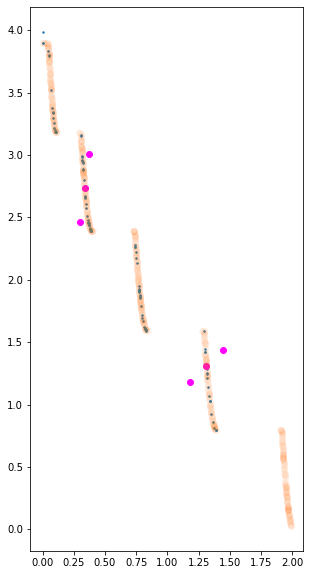

In [52]:
plt.figure(figsize=[10, 10])
plt.scatter(*y.T, s=2)
plt.scatter(*targets.T, c="magenta")
# plt.scatter(*t1, c="magenta")
# plt.scatter(*t2, c="magenta")
plt.scatter(*ref_points.T, c="C1", alpha=0.02)
plt.gca().axis("scaled")

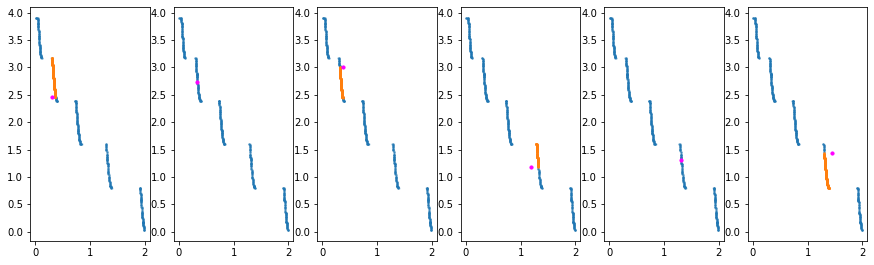

In [53]:
fig, axes = plt.subplots(1, 6,figsize=[15, 10])

target = targets[2]

for ax, target in zip(axes.flat, targets):
    igd_points, other_points = get_target_igd_refpoints(target, ref_points) 
    
    ax.scatter(*other_points.T, c="C0", s=2, alpha=0.2)
    ax.scatter(*igd_points.T, c="C1", s=2)
    ax.scatter(*target.T, c="magenta", s=10)
    ax.axis('scaled')

In [62]:
from experiments.directed.data.wfg2_3obj_6dim.problem_setup import func, k, l, M, n_dim, n_obj, y
print("{} {}obj {}dim".format(func, n_obj, n_dim), "k:{}".format(k), "l:{}".format(l), "M:{}".format(M))

WFG2
<built-in function WFG2> 3obj 6dim k:2 l:4 M:3


In [63]:
ref_points = np.load("../../../undirected/igd_refpoints/problem_refpoints/data/wfg2_3d_refpoints")

In [89]:
targets = np.asarray(target_dict['WFG2_3obj_6dim'])

In [90]:
ref_points.shape

(3499, 3)

In [91]:
# t1 = ref_points[np.argsort(ref_points[:,0])][-400]
# t2 = ref_points[np.argsort(ref_points[:,0])][900]
# targets = np.zeros((6, n_obj))
# for i, t in enumerate([t1, t2]):
#     for j, a in enumerate([0.9, 1., 1.1]):
#         targets[i*3+j] = np.round(t*a, 3)
# targets

In [92]:
%matplotlib qt
fig = plt.figure(figsize=[10, 10])
ax = fig.gca(projection="3d")
ax.scatter(*y.T, s=2)
ax.scatter(*targets.T, c="magenta")
ax.scatter(*ref_points.T, c="C1", alpha=0.02)

In [93]:
fig, axes = plt.subplots(2, 3,figsize=[15, 10], subplot_kw={'projection': "3d"})

for ax, target in zip(axes.flat, targets):
    igd_points, other_points = get_target_igd_refpoints(target, y) 
    
    ax.scatter(*other_points.T, c="C0", s=2, alpha=0.2)
    ax.scatter(*igd_points.T, c="C1", s=2)
    ax.scatter(*target.T, c="magenta", s=10)

In [94]:
fig, axes = plt.subplots(2, 3,figsize=[15, 10], subplot_kw={'projection': "3d"})

target = targets[2]

for ax, target in zip(axes.flat, targets):
    igd_points, other_points = get_target_igd_refpoints(target, ref_points) 
    
    ax.scatter(*other_points.T, c="C0", s=2, alpha=0.2)
    ax.scatter(*igd_points.T, c="C1", s=2)
    ax.scatter(*target.T, c="magenta", s=10)

In [97]:
from experiments.directed.data.wfg2_4obj_10dim.problem_setup import func, k, l, M, n_dim, n_obj, y
print("{} {}obj {}dim".format(func, n_obj, n_dim), "k:{}".format(k), "l:{}".format(l), "M:{}".format(M))

WFG2
<built-in function WFG2> 4obj 10dim k:6 l:4 M:4


In [108]:
ref_points = np.load("../../../undirected/igd_refpoints/problem_refpoints/data/wfg2_4d_refpoints")
ref_points = Pareto_split(ref_points)[0]
ref_points.shape

(4497, 4)

In [117]:
t1 = ref_points[np.argsort(ref_points[:, 0])][1200]
t2 = ref_points[np.argsort(ref_points[:, 0])][2650]
print(t1)
print(t2)

[0.05926112 2.59963043 0.0247067  1.3672962 ]
[2.67992847e-01 5.93682017e-09 1.49883826e-02 6.53265411e+00]


In [120]:
targets = np.zeros((6, n_obj))
for i, t in enumerate([t1, t2]):
    for j, a in enumerate([0.9, 1., 1.1]):
        targets[i*3+j] = t*a
targets

array([[5.33350067e-02, 2.33966739e+00, 2.22360286e-02, 1.23056658e+00],
       [5.92611186e-02, 2.59963043e+00, 2.47066985e-02, 1.36729620e+00],
       [6.51872304e-02, 2.85959347e+00, 2.71773683e-02, 1.50402582e+00],
       [2.41193562e-01, 5.34313815e-09, 1.34895443e-02, 5.87938870e+00],
       [2.67992847e-01, 5.93682017e-09, 1.49883826e-02, 6.53265411e+00],
       [2.94792132e-01, 6.53050219e-09, 1.64872208e-02, 7.18591952e+00]])

In [60]:
targets = np.asarray(target_dict['WFG1_4obj_5dim'])
targets

array([[0.00506805, 0.01450383, 2.0741083 , 2.67170142],
       [0.00563116, 0.01611537, 2.30456478, 2.96855713],
       [0.00619428, 0.01772691, 2.53502125, 3.26541285],
       [0.2840733 , 0.33494929, 0.59489375, 0.77715356],
       [0.315637  , 0.37216588, 0.66099306, 0.86350396],
       [0.3472007 , 0.40938246, 0.72709236, 0.94985435]])